# Generating SQL for SQLite using OpenAI via Vanna.AI (Recommended), Vanna Hosted Vector DB (Recommended)
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-openai-standard-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-mistral-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [ ]:
%pip install vanna

In [2]:
import vanna
from vanna.remote import VannaDefault

In [ ]:
api_key = # Your API key from https://vanna.ai/account/profile 

vanna_model_name = # Your model name from https://vanna.ai/account/profile 
vn = VannaDefault(model=vanna_model_name, api_key=api_key)


In [3]:
api_key = ''

vanna_model_name = 'vanna_test_model'
vn = VannaDefault(model=vanna_model_name, api_key=api_key)


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> SQLite</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../other-database-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [5]:
vn.connect_to_sqlite('sakila.db')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [6]:

df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")
df_ddl

,type,sql
0,table,CREATE TABLE actor (\n actor_id integer PRIMA...
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,index,CREATE INDEX idx_actor_last_name ON actor(last...
3,trigger,CREATE TRIGGER actor_trigger_ai AFTER INSERT O...
4,trigger,CREATE TRIGGER actor_trigger_au AFTER UPDATE O...
...,...,...
71,view,CREATE VIEW customer_list\nAS\nSELECT cu.custo...
72,view,CREATE VIEW film_list\nAS\nSELECT film.film_id...
73,view,CREATE VIEW staff_list\nAS\nSELECT s.staff_id ...
74,view,CREATE VIEW sales_by_store\nAS\nSELECT\n s.st...


In [14]:
for ddl in df_ddl['sql'].to_list():
    vn.train(ddl=ddl)

Adding ddl: CREATE TABLE actor (
  actor_id integer PRIMARY KEY AUTOINCREMENT NOT NULL,
  first_name VARCHAR(45) NOT NULL,
  last_name VARCHAR(45) NOT NULL,
  last_update TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP
  )
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE INDEX idx_actor_last_name ON actor(last_name)

Adding ddl: CREATE TRIGGER actor_trigger_ai AFTER INSERT ON actor
 BEGIN
  UPDATE actor SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TRIGGER actor_trigger_au AFTER UPDATE ON actor
 BEGIN
  UPDATE actor SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TABLE country (
  country_id SMALLINT NOT NULL,
  country VARCHAR(50) NOT NULL,
  last_update TIMESTAMP,
  PRIMARY KEY  (country_id)
)
Adding ddl: CREATE TRIGGER country_trigger_ai AFTER INSERT ON country
 BEGIN
  UPDATE country SET last_update = DATETIME('NOW')  WHERE rowid = new.rowid;
 END
Adding ddl: CREATE TRIGGER country_trigger_a

In [ ]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")


In [15]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,45486-ddl,ddl,NaN,CREATE TRIGGER customer_trigger_au AFTER UPDAT...
1,45530-ddl,ddl,NaN,CREATE VIEW customer_list\nAS\nSELECT cu.custo...
2,45519-ddl,ddl,NaN,CREATE INDEX idx_fk_staff_id ON payment(staff_...
3,45479-ddl,ddl,NaN,CREATE TRIGGER category_trigger_ai AFTER INSER...
4,45465-ddl,ddl,NaN,CREATE TRIGGER country_trigger_ai AFTER INSERT...
...,...,...,...,...
71,45468-ddl,ddl,NaN,CREATE INDEX idx_fk_country_id ON city(country...
72,45494-ddl,ddl,NaN,CREATE INDEX idx_fk_film_actor_actor ON film_a...
73,45524-ddl,ddl,NaN,CREATE INDEX idx_rental_fk_inventory_id ON ren...
74,45474-ddl,ddl,NaN,CREATE TRIGGER address_trigger_au AFTER UPDATE...


In [11]:
# You can remove training data if there's obsolete/incorrect information. 
ids = training_data['id'].tolist()

for id in ids:
    vn.remove_training_data(id=id)


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

SELECT COUNT(*) AS total_cities FROM city;
   total_cities
0           600


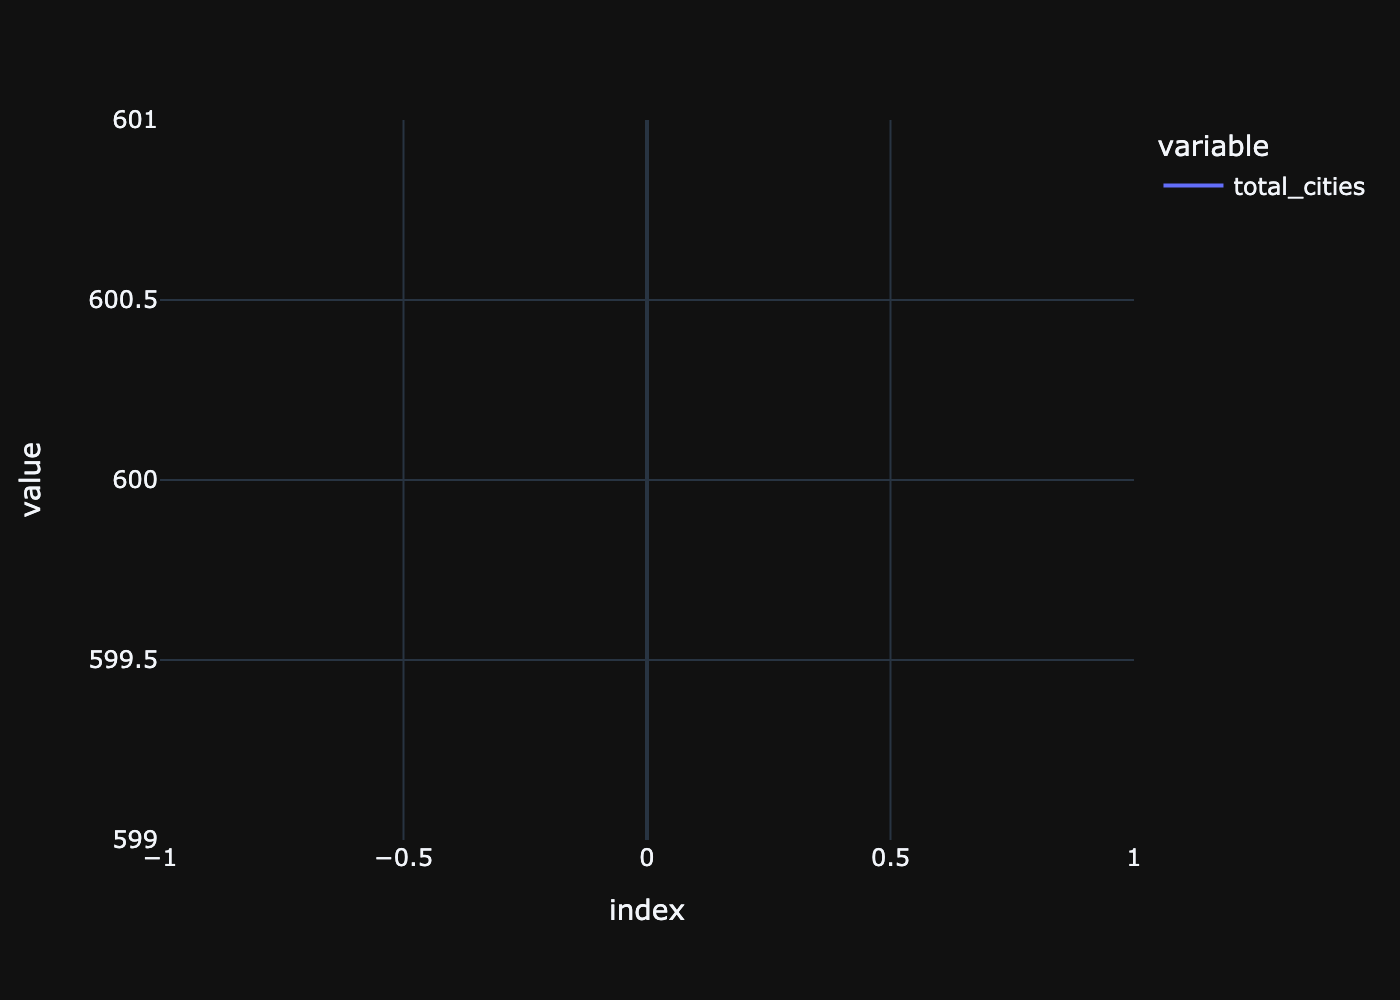

('SELECT COUNT(*) AS total_cities FROM city;',
    total_cities
 0           600,
 None)

In [33]:
vn.ask(question='how many cities are there')

SELECT f.rating AS rating, COUNT(*) AS total_movies
FROM film AS f
JOIN inventory AS i ON f.film_id = i.film_id
GROUP BY f.rating
ORDER BY total_movies DESC;
  rating  total_movies
0  PG-13          1018
1  NC-17           944
2     PG           924
3      R           904
4      G           791


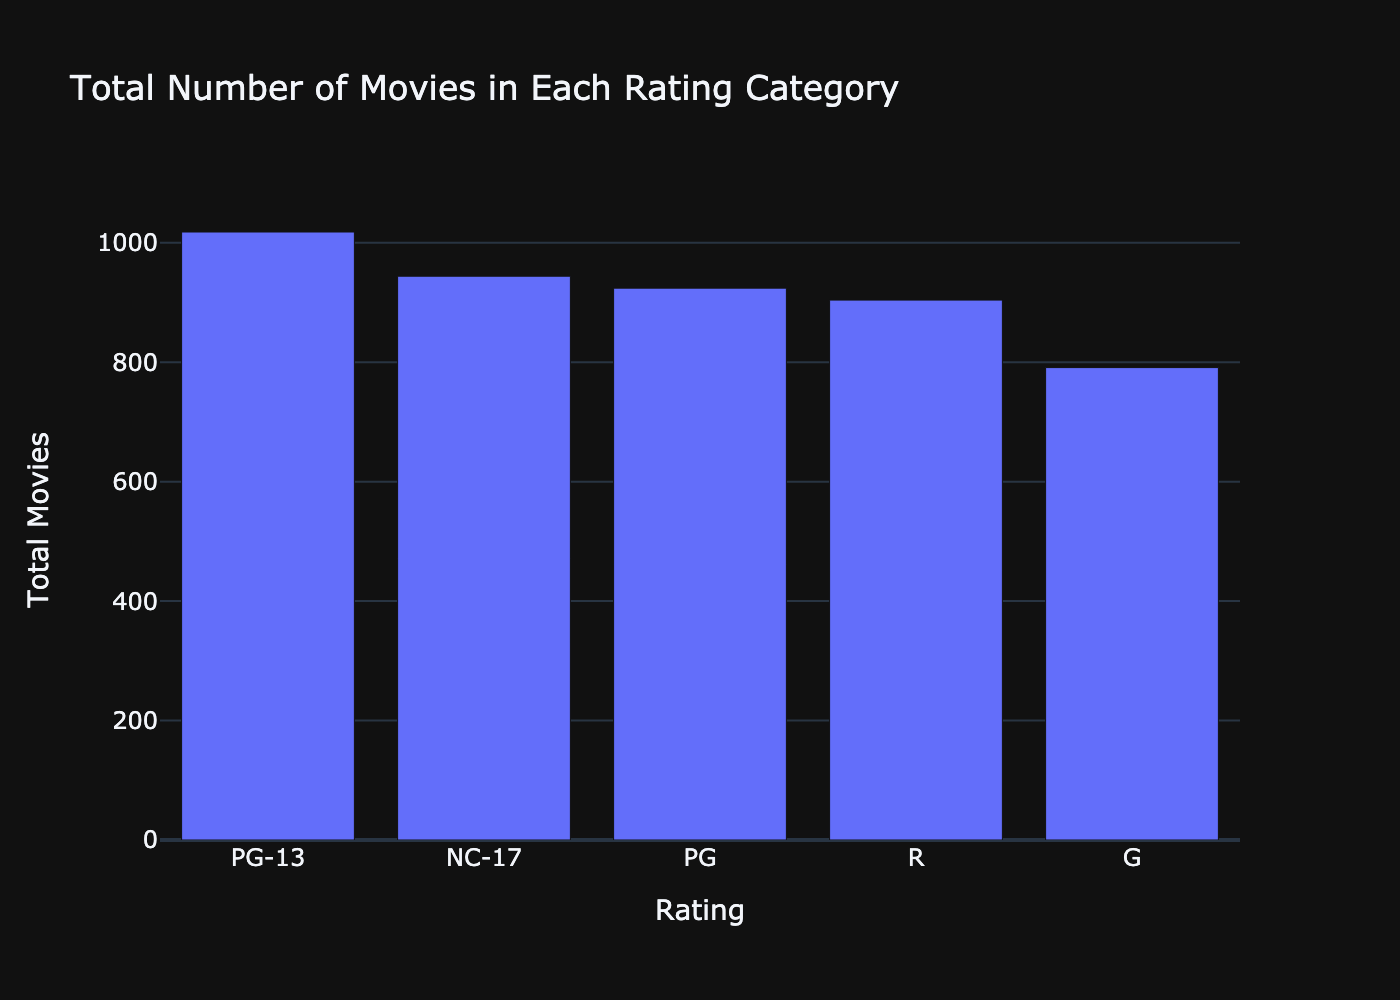

('SELECT f.rating AS rating, COUNT(*) AS total_movies\nFROM film AS f\nJOIN inventory AS i ON f.film_id = i.film_id\nGROUP BY f.rating\nORDER BY total_movies DESC;',
   rating  total_movies
 0  PG-13          1018
 1  NC-17           944
 2     PG           924
 3      R           904
 4      G           791,
 None)

In [34]:
vn.ask(question='What is the total number of movies in each rating category held in inventory? sort them descendingly')

In [35]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


In [38]:
# https://www.jooq.org/sakila
# https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database?select=sqlite-sakila.db
# https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database?select=sqlite-sakila.db
# https://github.com/ivanceras/sakila/tree/master